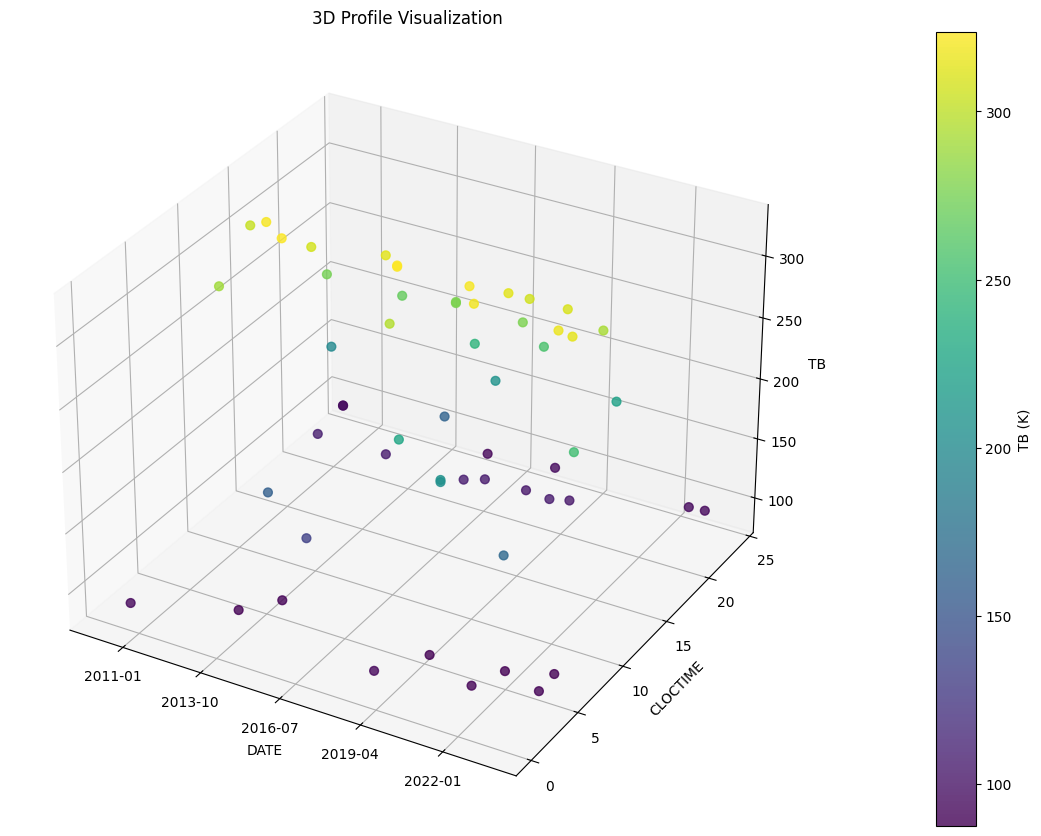

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import matplotlib.dates as mdates

# Output from:
#   SELECT DATETIME, CLOCTIME, TB 
#   FROM COMPTON_CRATER 
#   WHERE CLAT BETWEEN 56.5521 AND 56.5587 
#   AND CLON BETWEEN 104.6752 AND 104.6871 
#   ORDER BY CLOCTIME;

# 56.5521, 104.6752
# 56.5521, 104.6871
# 56.5587, 104.6752
# 56.5587, 104.6871

raw_data = """
23-Feb-2010 02:57:26.145|14.37111|303.219
04-Apr-2010 21:46:50.060|23.46806|94.754
04-Apr-2010 21:46:50.060|23.46889|94.883
29-Sep-2010 14:49:21.409|0.14806|92.186
09-Nov-2010 07:21:06.575|9.20972|290.34
20-Dec-2010 12:20:55.789|18.62444|107.398
12-Mar-2011 09:55:49.592|13.04583|320.325
06-Jan-2012 15:20:35.665|17.15055|198.281
28-Mar-2012 13:04:48.384|11.59972|322.522
25-Aug-2012 02:35:39.814|13.37389|307.404
28-Jul-2012 19:37:01.488|15.14722|274.051
24-May-2013 19:18:46.034|18.81444|105.372
08-Jun-2013 00:39:42.355|6.39722|158.951
01-Aug-2013 14:20:48.265|2.85111|87.761
24-Jun-2014 18:28:10.007|4.67417|89.271
20-Nov-2014 22:57:12.914|6.03333|134.152
01-Jan-2015 13:26:40.567|15.77222|268.25
28-Jan-2015 18:50:51.990|13.84194|313.024
24-Nov-2015 13:20:17.091|17.60056|162.881
03-Sep-2015 19:57:11.516|23.19361|91.801
14-Feb-2016 06:40:59.615|11.85694|322.718
14-Feb-2016 06:40:59.743|11.85722|323.711
21-Apr-2016 12:44:29.670|18.47111|106.367
04-Sep-2016 17:14:41.545|9.38611|296.95
16-Oct-2016 11:05:19.830|19.32055|104.21
09-Dec-2016 22:01:27.771|15.51444|276.388
09-Dec-2016 22:01:27.899|15.51444|277.266
07-May-2017 17:33:58.841|16.29833|241.179
20-Sep-2017 20:05:47.027|7.13667|226.823
01-Nov-2017 13:54:24.003|17.05556|209.239
07-Jan-2018 15:56:54.281|23.43889|94.396
03-Mar-2018 02:12:07.624|19.58361|102.776
19-Jun-2018 22:47:25.542|12.13861|320.562
30-Nov-2018 05:43:21.798|0.93194|92.625
06-Mar-2019 11:15:45.694|6.96806|204.129
06-Mar-2019 11:15:45.822|6.96806|205.819
11-Jan-2019 01:05:12.338|10.83917|318.573
12-May-2019 11:13:22.755|13.43806|312.705
15-Apr-2019 05:46:22.265|15.28583|277.503
19-Feb-2019 20:19:37.493|19.1025|105.524
16-Aug-2019 16:36:30.399|19.81306|102.816
25-Sep-2019 10:20:06.944|4.14639|87.69
06-Nov-2019 06:39:26.556|14.15528|306.818
10-Oct-2019 01:44:04.311|16.06056|256.215
01-Sep-2021 04:03:15.020|2.5025|89.947
08-Jul-2021 19:58:15.024|6.25333|167.008
22-Mar-2021 03:07:51.531|13.79|309.838
09-Nov-2021 06:37:42.494|10.68278|317.08
14-Jan-2022 22:51:02.726|16.74222|222.624
11-Feb-2022 03:04:14.773|14.77694|292.664
29-Jan-2022 17:54:32.251|4.72306|88.169
06-Apr-2022 10:07:36.285|10.85417|313.901
16-Sep-2022 07:52:28.465|23.47667|93.588
13-Mar-2023 02:15:46.962|23.71639|92.321
18-May-2023 15:13:35.025|5.82667|87.482
21-Apr-2023 11:53:01.304|7.74611|251.427
14-Jun-2023 18:37:43.893|3.92917|88.508
"""

# Parse data
dates, cloctimes, tbs = [], [], []
for line in raw_data.strip().splitlines():
    datetime_str, cloc_str, tb_str = line.strip().split("|")
    dt = datetime.strptime(datetime_str.strip(), "%d-%b-%Y %H:%M:%S.%f")
    dates.append(dt)
    cloctimes.append(float(cloc_str))
    tbs.append(float(tb_str))

# Convert datetime to numerical format
date_nums = mdates.date2num(dates)

# Create 3D plot
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot points colored by temperature but fixed size
scatter = ax.scatter(date_nums, cloctimes, tbs, c=tbs, cmap='viridis', s=40, alpha=0.8)

# Add color bar to show temperature scale
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('TB (K)')

# Axis formatting
ax.set_xlabel('DATE')
ax.set_ylabel('CLOCTIME')
ax.set_zlabel('TB')
ax.set_title('3D Profile Visualization')

# Format X-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(pad=3.0)
plt.show()


In [5]:
dates

[datetime.datetime(2010, 2, 23, 2, 57, 26, 145000),
 datetime.datetime(2010, 4, 4, 21, 46, 50, 60000),
 datetime.datetime(2010, 4, 4, 21, 46, 50, 60000),
 datetime.datetime(2010, 9, 29, 14, 49, 21, 409000),
 datetime.datetime(2010, 11, 9, 7, 21, 6, 575000),
 datetime.datetime(2010, 12, 20, 12, 20, 55, 789000),
 datetime.datetime(2011, 3, 12, 9, 55, 49, 592000),
 datetime.datetime(2012, 1, 6, 15, 20, 35, 665000),
 datetime.datetime(2012, 3, 28, 13, 4, 48, 384000),
 datetime.datetime(2012, 8, 25, 2, 35, 39, 814000),
 datetime.datetime(2012, 7, 28, 19, 37, 1, 488000),
 datetime.datetime(2013, 5, 24, 19, 18, 46, 34000),
 datetime.datetime(2013, 6, 8, 0, 39, 42, 355000),
 datetime.datetime(2013, 8, 1, 14, 20, 48, 265000),
 datetime.datetime(2014, 6, 24, 18, 28, 10, 7000),
 datetime.datetime(2014, 11, 20, 22, 57, 12, 914000),
 datetime.datetime(2015, 1, 1, 13, 26, 40, 567000),
 datetime.datetime(2015, 1, 28, 18, 50, 51, 990000),
 datetime.datetime(2015, 11, 24, 13, 20, 17, 91000),
 datetime.

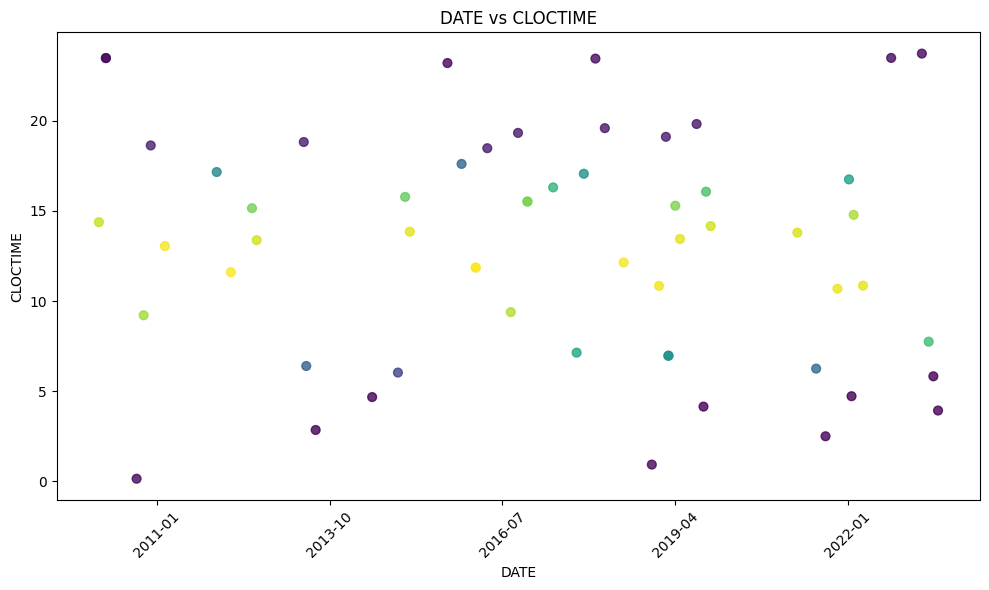

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sc = ax.scatter(date_nums, cloctimes, c=tbs, cmap='viridis', s=40, alpha=0.8)
ax.set_xlabel('DATE')
ax.set_ylabel('CLOCTIME')
ax.set_title('DATE vs CLOCTIME')

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

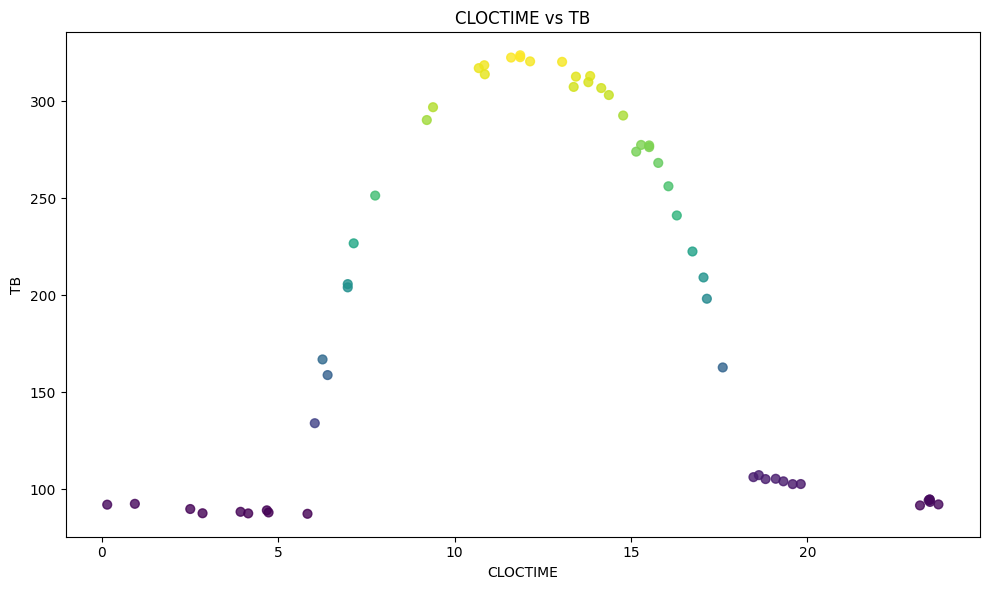

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cloctimes, tbs, c=tbs, cmap='viridis', s=40, alpha=0.8)
plt.xlabel('CLOCTIME')
plt.ylabel('TB')
plt.title('CLOCTIME vs TB')
plt.tight_layout()
plt.show()


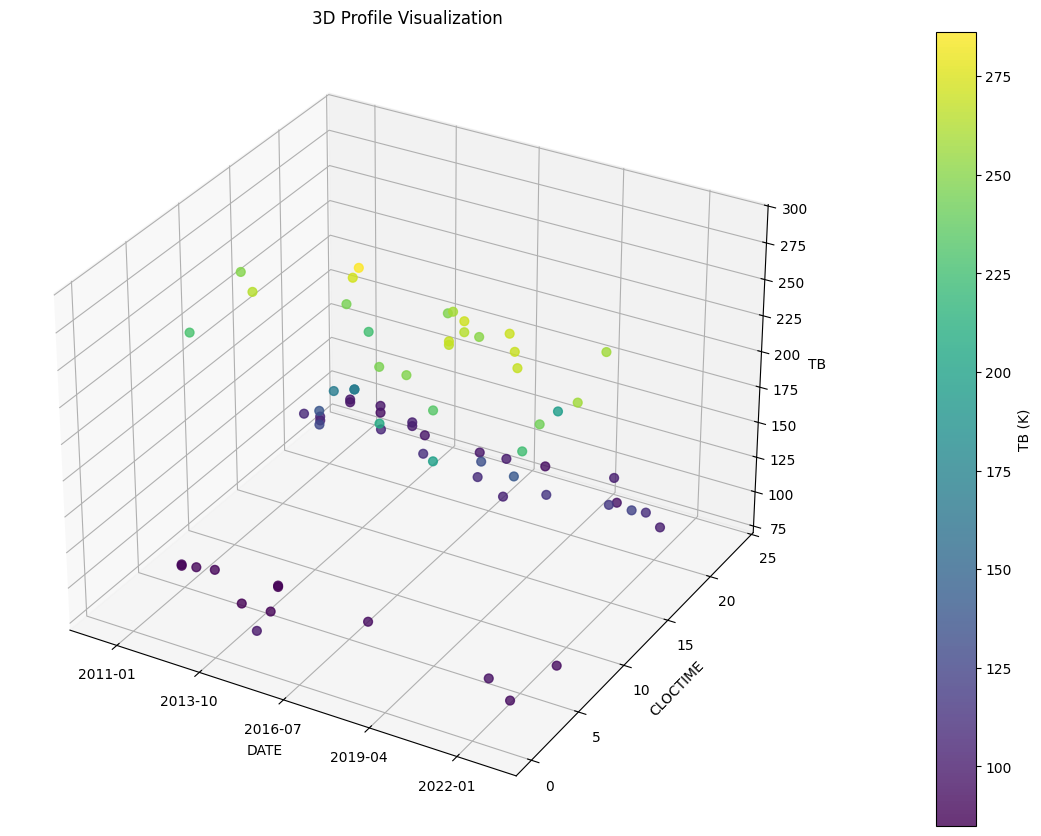

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import matplotlib.dates as mdates

# SELECT CLOCTIME, TB FROM ZUCCHIUS_CRATER WHERE CLAT BETWEEN -60.9943 AND -60.9877 AND CLON BETWEEN 308.2044 AND 308.218 ORDER BY CLOCTIME;
raw_data = """
23-Feb-2015 07:49:57.324|0.12278|97.882                                                                                                                    
02-Sep-2022 08:34:18.920|1.69722|91.824                                                                                                                    
14-Sep-2021 05:38:20.072|2.72083|93.598                                                                                                                    
05-Jul-2014 22:45:00.009|3.36639|86.487                                                                                                                    
16-Jul-2013 14:27:59.491|3.40667|85.315                                                                                                                    
05-May-2017 23:31:19.824|4.44333|91.841                                                                                                                    
14-Jan-2011 23:42:04.119|4.84639|86.477                                                                                                                    
14-Jan-2011 23:42:04.119|4.84722|87.469                                                                                                                    
11-Jul-2011 04:11:12.081|4.88472|88.441                                                                                                                    
04-Jan-2012 20:41:47.788|5.28194|87.363                                                                                                                    
05-Dec-2022 00:05:53.978|5.76028|91.254
14-Dec-2013 04:18:10.938|5.79861|84.895
14-Dec-2013 04:18:10.938|5.79917|85.898
21-Jul-2021 21:22:20.214|6.46833|224.442
22-Sep-2018 11:39:53.614|6.69111|232.954
22-Sep-2018 11:39:53.614|6.69167|198.551
17-Dec-2021 00:34:41.580|6.86222|242.696
03-Oct-2017 15:26:53.044|7.12083|248.222
14-Oct-2016 17:06:57.028|7.47194|245.968
14-Oct-2016 17:06:57.028|7.4725|207.566
07-Nov-2022 20:20:20.068|7.72778|257.615
28-Dec-2020 19:49:20.908|7.78417|268.694
27-May-2010 19:21:13.961|8.08778|227.811
26-Aug-2018 06:20:57.480|8.53722|268.259
26-Aug-2018 06:20:57.480|8.53806|265.899
06-May-2012 05:41:48.423|8.62361|264.042
06-Jul-2020 07:45:06.695|9.13556|269.091
30-Jul-2018 01:09:29.172|10.36722|263.851
30-Jul-2018 01:09:29.300|10.36806|271.19
14-Dec-2019 05:35:47.002|10.49556|270.292
08-Mar-2015 04:05:29.270|10.53361|286.312
12-Sep-2014 19:15:00.609|11.42194|272.202
02-Jul-2018 19:56:22.029|12.18694|250.244
27-Sep-2010 18:32:25.060|12.21861|249.281
19-Feb-2014 16:16:15.416|12.50556|245.191
13-Jul-2017 23:57:26.380|12.64583|259.09
23-Mar-2022 09:36:37.711|13.01278|257.7
16-Aug-2014 13:02:06.944|13.23194|225.087
20-Dec-2016 21:05:59.757|13.94972|247.676
03-Feb-2013 00:03:50.544|14.33778|168.304
15-Apr-2020 17:58:28.306|14.70389|196.091
30-Jul-2013 19:54:52.251|14.97778|168.768
30-Jul-2013 19:54:52.251|14.97833|168.801
01-Nov-2018 05:56:21.454|14.98111|139.856
18-Jan-2012 02:41:11.593|16.00417|138.24
18-Jan-2012 02:41:11.593|16.00472|128.298
20-May-2017 12:55:47.587|16.27861|133.528
28-Jan-2022 01:53:43.306|16.93778|124.993
31-Mar-2019 23:01:04.033|17.23|115.991
16-Oct-2017 06:33:19.119|17.37111|104.469
27-Oct-2016 10:10:31.282|17.78528|109.924
08-Feb-2021 19:42:34.935|17.81806|117.311
19-Nov-2014 04:27:56.422|18.16278|112.345
31-Dec-2021 21:38:25.886|18.91333|110.955
28-May-2022 22:30:21.317|19.14361|101.596
10-Jun-2010 12:54:28.405|19.26917|107.561
04-Dec-2010 20:53:12.609|19.50556|107.073
04-Dec-2010 20:53:12.609|19.50639|104.248
13-Nov-2012 04:25:02.575|20.01306|106.759
21-Jun-2020 12:42:46.640|21.085|95.111
02-Sep-2016 23:11:39.017|21.52555|100.21
14-Sep-2015 20:59:18.194|21.76|97.375
06-Oct-2013 09:26:18.771|21.97333|96.636
12-Apr-2013 17:15:45.970|22.13778|99.525
12-Apr-2013 17:15:45.970|22.13861|102.278
28-Dec-2019 23:18:26.714|22.45083|101.916
26-Jul-2017 15:04:48.577|22.95028|91.978
11-Oct-2010 07:03:32.005|23.22139|97.626
11-Oct-2010 07:03:32.005|23.22222|95.556
01-Oct-2011 00:29:34.658|23.51389|97.168
01-Oct-2011 00:29:34.658|23.51472|92.107
"""

# Parse data
dates, cloctimes, tbs = [], [], []
for line in raw_data.strip().splitlines():
    datetime_str, cloc_str, tb_str = line.strip().split("|")
    dt = datetime.strptime(datetime_str.strip(), "%d-%b-%Y %H:%M:%S.%f")
    dates.append(dt)
    cloctimes.append(float(cloc_str))
    tbs.append(float(tb_str))

# Convert datetime to numerical format
date_nums = mdates.date2num(dates)

# Create 3D plot
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot points colored by temperature but fixed size
scatter = ax.scatter(date_nums, cloctimes, tbs, c=tbs, cmap='viridis', s=40, alpha=0.8)

# Add color bar to show temperature scale
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('TB (K)')

# Axis formatting
ax.set_xlabel('DATE')
ax.set_ylabel('CLOCTIME')
ax.set_zlabel('TB')
ax.set_title('3D Profile Visualization')

# Format X-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(pad=3.0)
plt.show()


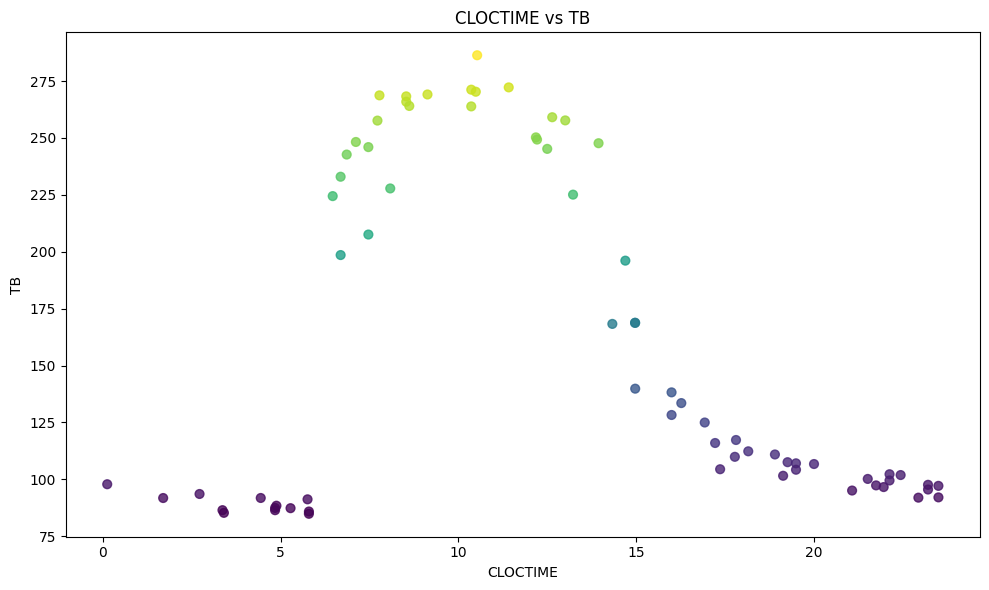

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cloctimes, tbs, c=tbs, cmap='viridis', s=40, alpha=0.8)
plt.xlabel('CLOCTIME')
plt.ylabel('TB')
plt.title('CLOCTIME vs TB')
plt.tight_layout()
plt.show()


In [1]:
from datetime import datetime

timestamps = [
    "23-Feb-2015 07:49:57.324", "02-Sep-2022 08:34:18.920", "14-Sep-2021 05:38:20.072",
    "05-Jul-2014 22:45:00.009", "16-Jul-2013 14:27:59.491", "05-May-2017 23:31:19.824",
    "14-Jan-2011 23:42:04.119", "14-Jan-2011 23:42:04.119", "11-Jul-2011 04:11:12.081",
    "04-Jan-2012 20:41:47.788", "05-Dec-2022 00:05:53.978", "14-Dec-2013 04:18:10.938",
    "14-Dec-2013 04:18:10.938", "21-Jul-2021 21:22:20.214", "22-Sep-2018 11:39:53.614",
    "22-Sep-2018 11:39:53.614", "17-Dec-2021 00:34:41.580", "03-Oct-2017 15:26:53.044",
    "14-Oct-2016 17:06:57.028", "14-Oct-2016 17:06:57.028", "07-Nov-2022 20:20:20.068",
    "28-Dec-2020 19:49:20.908", "27-May-2010 19:21:13.961", "26-Aug-2018 06:20:57.480",
    "26-Aug-2018 06:20:57.480", "06-May-2012 05:41:48.423", "06-Jul-2020 07:45:06.695",
    "30-Jul-2018 01:09:29.172", "30-Jul-2018 01:09:29.300", "14-Dec-2019 05:35:47.002",
    "08-Mar-2015 04:05:29.270", "12-Sep-2014 19:15:00.609", "02-Jul-2018 19:56:22.029",
    "27-Sep-2010 18:32:25.060", "19-Feb-2014 16:16:15.416", "13-Jul-2017 23:57:26.380",
    "23-Mar-2022 09:36:37.711", "16-Aug-2014 13:02:06.944", "20-Dec-2016 21:05:59.757",
    "03-Feb-2013 00:03:50.544", "15-Apr-2020 17:58:28.306", "30-Jul-2013 19:54:52.251",
    "30-Jul-2013 19:54:52.251", "01-Nov-2018 05:56:21.454", "18-Jan-2012 02:41:11.593",
    "18-Jan-2012 02:41:11.593", "20-May-2017 12:55:47.587", "28-Jan-2022 01:53:43.306",
    "31-Mar-2019 23:01:04.033", "16-Oct-2017 06:33:19.119", "27-Oct-2016 10:10:31.282",
    "08-Feb-2021 19:42:34.935", "19-Nov-2014 04:27:56.422", "31-Dec-2021 21:38:25.886",
    "28-May-2022 22:30:21.317", "10-Jun-2010 12:54:28.405", "04-Dec-2010 20:53:12.609",
    "04-Dec-2010 20:53:12.609", "13-Nov-2012 04:25:02.575", "21-Jun-2020 12:42:46.640",
    "02-Sep-2016 23:11:39.017", "14-Sep-2015 20:59:18.194", "06-Oct-2013 09:26:18.771",
    "12-Apr-2013 17:15:45.970", "12-Apr-2013 17:15:45.970", "28-Dec-2019 23:18:26.714",
    "26-Jul-2017 15:04:48.577", "11-Oct-2010 07:03:32.005", "11-Oct-2010 07:03:32.005",
    "01-Oct-2011 00:29:34.658", "01-Oct-2011 00:29:34.658"
]

# Sort by datetime
sorted_timestamps = sorted(timestamps, key=lambda x: datetime.strptime(x, "%d-%b-%Y %H:%M:%S.%f"))

# Print result
for t in sorted_timestamps:
    print(t)

27-May-2010 19:21:13.961
10-Jun-2010 12:54:28.405
27-Sep-2010 18:32:25.060
11-Oct-2010 07:03:32.005
11-Oct-2010 07:03:32.005
04-Dec-2010 20:53:12.609
04-Dec-2010 20:53:12.609
14-Jan-2011 23:42:04.119
14-Jan-2011 23:42:04.119
11-Jul-2011 04:11:12.081
01-Oct-2011 00:29:34.658
01-Oct-2011 00:29:34.658
04-Jan-2012 20:41:47.788
18-Jan-2012 02:41:11.593
18-Jan-2012 02:41:11.593
06-May-2012 05:41:48.423
13-Nov-2012 04:25:02.575
03-Feb-2013 00:03:50.544
12-Apr-2013 17:15:45.970
12-Apr-2013 17:15:45.970
16-Jul-2013 14:27:59.491
30-Jul-2013 19:54:52.251
30-Jul-2013 19:54:52.251
06-Oct-2013 09:26:18.771
14-Dec-2013 04:18:10.938
14-Dec-2013 04:18:10.938
19-Feb-2014 16:16:15.416
05-Jul-2014 22:45:00.009
16-Aug-2014 13:02:06.944
12-Sep-2014 19:15:00.609
19-Nov-2014 04:27:56.422
23-Feb-2015 07:49:57.324
08-Mar-2015 04:05:29.270
14-Sep-2015 20:59:18.194
02-Sep-2016 23:11:39.017
14-Oct-2016 17:06:57.028
14-Oct-2016 17:06:57.028
27-Oct-2016 10:10:31.282
20-Dec-2016 21:05:59.757
05-May-2017 23:31:19.824


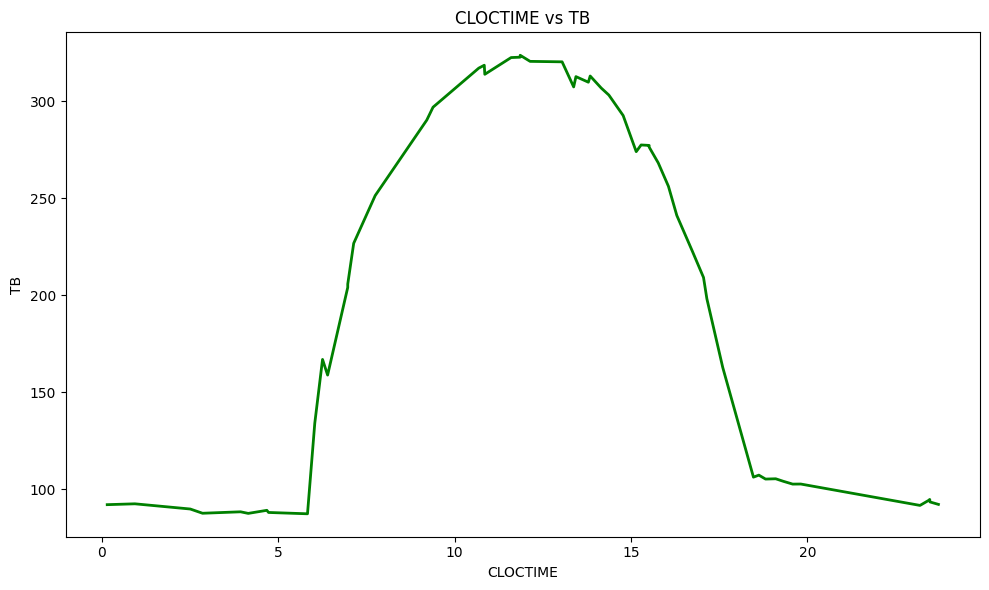

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sort data
sorted_indices = np.argsort(cloctimes)
cloctimes = np.array(cloctimes)[sorted_indices]
tbs = np.array(tbs)[sorted_indices]

# Plot as a continuous line
plt.figure(figsize=(10, 6))
plt.plot(cloctimes, tbs, color='green', linewidth=2)
plt.xlabel('CLOCTIME')
plt.ylabel('TB')
plt.title('CLOCTIME vs TB')
plt.tight_layout()
plt.show()
